# Executive Marketing Challenge: BigBasket
- Bigbasket.com Exploratory Data Analysis
- January 31, 2021
- Bigbasket.com is an India-based online grocery & delivery store

#### Libraries

In [1]:
import pandas as pd
import numpy as np

import os

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

import re
from datetime import datetime
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

#### Read in data

In [2]:
df = pd.read_excel('C:/Users/scarl/Documents/School/GMMA 831 Marketing Analytics/Bigbasket Exhibits.xls', 
                   sheet_name='POS DATA',
                      parse_dates=True)

df.head(100)

,Member,Order,SKU,Created On,Description
0,M09736,6468572,34993740,22-09-2014 22:45,Other Sauces
1,M09736,6468572,15669800,22-09-2014 22:45,Cashews
2,M09736,6468572,34989501,22-09-2014 22:45,Other Dals
3,M09736,6468572,7572303,22-09-2014 22:45,Namkeen
4,M09736,6468572,15669856,22-09-2014 22:45,Sugar
...,...,...,...,...,...
95,M09736,6638454,15669830,2014-10-08 09:40:00,Other Rice Products
96,M09736,6638454,7572303,2014-10-08 09:40:00,Namkeen
97,M09736,6638454,15668688,2014-10-08 09:40:00,Root Vegetables
98,M09736,6638454,15668685,2014-10-08 09:40:00,Beans


#### Data cleaning

In [3]:
# Missing value check
df.isna().sum()

Member         0
Order          0
SKU            0
Created On     0
Description    0
dtype: int64

In [4]:
df = df.replace(['CFLs,cfls,7832553,2,0\r\n7831582,Channa Dal,channa-dal,7832491,2,0\r\n7832360,Cheese,cheese,7832363,2,0\r\n7831689,Chewing Gum,chewing-gum,7831685,2,0\r\n7832047,ChildrenS Books'],'CFLs')
df.columns = df.columns.str.replace(' ','_') # removing spaces from feature names
df.Description = df.Description.str.replace(' ','_') # removing spaces from values

df['Member'] = df['Member'].str[1:] # removing non-numerics from Member identifier
df['Member'] = pd.to_numeric(df['Member']) # converting to numeric

df['Sales'] = 1 # adding sales indicator

# Correcting date formatting : Step 1
df['date1'] = pd.to_datetime(df['Created_On'], errors='coerce', format='%Y-%m-%d %H:%M')
df['date2'] = pd.to_datetime(df['Created_On'], errors='coerce', format='%d-%m-%Y %H:%M')

df.head(100)

,Member,Order,SKU,Created_On,Description,Sales,date1,date2
0,9736,6468572,34993740,22-09-2014 22:45,Other_Sauces,1,NaT,2014-09-22 22:45:00
1,9736,6468572,15669800,22-09-2014 22:45,Cashews,1,NaT,2014-09-22 22:45:00
2,9736,6468572,34989501,22-09-2014 22:45,Other_Dals,1,NaT,2014-09-22 22:45:00
3,9736,6468572,7572303,22-09-2014 22:45,Namkeen,1,NaT,2014-09-22 22:45:00
4,9736,6468572,15669856,22-09-2014 22:45,Sugar,1,NaT,2014-09-22 22:45:00
...,...,...,...,...,...,...,...,...
95,9736,6638454,15669830,2014-10-08 09:40:00,Other_Rice_Products,1,2014-10-08 09:40:00,NaT
96,9736,6638454,7572303,2014-10-08 09:40:00,Namkeen,1,2014-10-08 09:40:00,NaT
97,9736,6638454,15668688,2014-10-08 09:40:00,Root_Vegetables,1,2014-10-08 09:40:00,NaT
98,9736,6638454,15668685,2014-10-08 09:40:00,Beans,1,2014-10-08 09:40:00,NaT


In [5]:
# Correcting date formatting : Step 2
df['Created_On'] = df['date1'].fillna(df['date2'])
df['Created_On'] = pd.to_datetime(df['Created_On'], errors='coerce', format='%Y-%m-%d %H:%M')
df.head(100)

,Member,Order,SKU,Created_On,Description,Sales,date1,date2
0,9736,6468572,34993740,2014-09-22 22:45:00,Other_Sauces,1,NaT,2014-09-22 22:45:00
1,9736,6468572,15669800,2014-09-22 22:45:00,Cashews,1,NaT,2014-09-22 22:45:00
2,9736,6468572,34989501,2014-09-22 22:45:00,Other_Dals,1,NaT,2014-09-22 22:45:00
3,9736,6468572,7572303,2014-09-22 22:45:00,Namkeen,1,NaT,2014-09-22 22:45:00
4,9736,6468572,15669856,2014-09-22 22:45:00,Sugar,1,NaT,2014-09-22 22:45:00
...,...,...,...,...,...,...,...,...
95,9736,6638454,15669830,2014-10-08 09:40:00,Other_Rice_Products,1,2014-10-08 09:40:00,NaT
96,9736,6638454,7572303,2014-10-08 09:40:00,Namkeen,1,2014-10-08 09:40:00,NaT
97,9736,6638454,15668688,2014-10-08 09:40:00,Root_Vegetables,1,2014-10-08 09:40:00,NaT
98,9736,6638454,15668685,2014-10-08 09:40:00,Beans,1,2014-10-08 09:40:00,NaT


In [6]:
# Date formatting: Dropping the extra date features
df.drop(['date1', 'date2'], axis=1, inplace=True) # dropping unncessessary features

df.head(100)

,Member,Order,SKU,Created_On,Description,Sales
0,9736,6468572,34993740,2014-09-22 22:45:00,Other_Sauces,1
1,9736,6468572,15669800,2014-09-22 22:45:00,Cashews,1
2,9736,6468572,34989501,2014-09-22 22:45:00,Other_Dals,1
3,9736,6468572,7572303,2014-09-22 22:45:00,Namkeen,1
4,9736,6468572,15669856,2014-09-22 22:45:00,Sugar,1
...,...,...,...,...,...,...
95,9736,6638454,15669830,2014-10-08 09:40:00,Other_Rice_Products,1
96,9736,6638454,7572303,2014-10-08 09:40:00,Namkeen,1
97,9736,6638454,15668688,2014-10-08 09:40:00,Root_Vegetables,1
98,9736,6638454,15668685,2014-10-08 09:40:00,Beans,1


## Exploratory Data Analysis

#### Dataset info

In [7]:
print('Number of categories: ', df.Description.nunique())
print('Number of different items: ', df.SKU.nunique())
print('Number of customers: ', df.Member.nunique())
print('Number of orders: ', df.Order.nunique())
print('Earliest order date: ', df.Created_On.min())
print('Latest order date: ', df.Created_On.max())
print('Dataset timeframe: ', df.Created_On.max()-df.Created_On.min())

Number of categories:  216
Number of different items:  1732
Number of customers:  106
Number of orders:  8387
Earliest order date:  2011-03-12 10:18:00
Latest order date:  2014-12-09 21:35:00
Dataset timeframe:  1368 days 11:17:00


#### Distribution of Features

In [8]:
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())

(62141, 6)
   Member    Order       SKU          Created_On   Description  Sales
0    9736  6468572  34993740 2014-09-22 22:45:00  Other_Sauces      1
1    9736  6468572  15669800 2014-09-22 22:45:00       Cashews      1
2    9736  6468572  34989501 2014-09-22 22:45:00    Other_Dals      1
3    9736  6468572   7572303 2014-09-22 22:45:00       Namkeen      1
4    9736  6468572  15669856 2014-09-22 22:45:00         Sugar      1
       Member    Order       SKU          Created_On            Description  \
62136   64379  8381435  15670260 2013-11-16 00:43:00            Organic_F&V   
62137   64379  8381435  15668597 2013-11-16 00:43:00      Exotic_Vegetables   
62138   64379  8381435   7570555 2013-11-16 00:43:00            Shoe_Polish   
62139   64379  8381435   7587490 2013-11-16 00:43:00  Organic_Dals_&_Pulses   
62140   64379  8381435  15669830 2013-11-16 00:43:00    Other_Rice_Products   

       Sales  
62136      1  
62137      1  
62138      1  
62139      1  
62140      1  
<cla

#### Most popular items

<Figure size 1440x1080 with 0 Axes>

Text(0.5, 1.0, 'Most Frequently Ordered Items')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text xticklabel objects>)

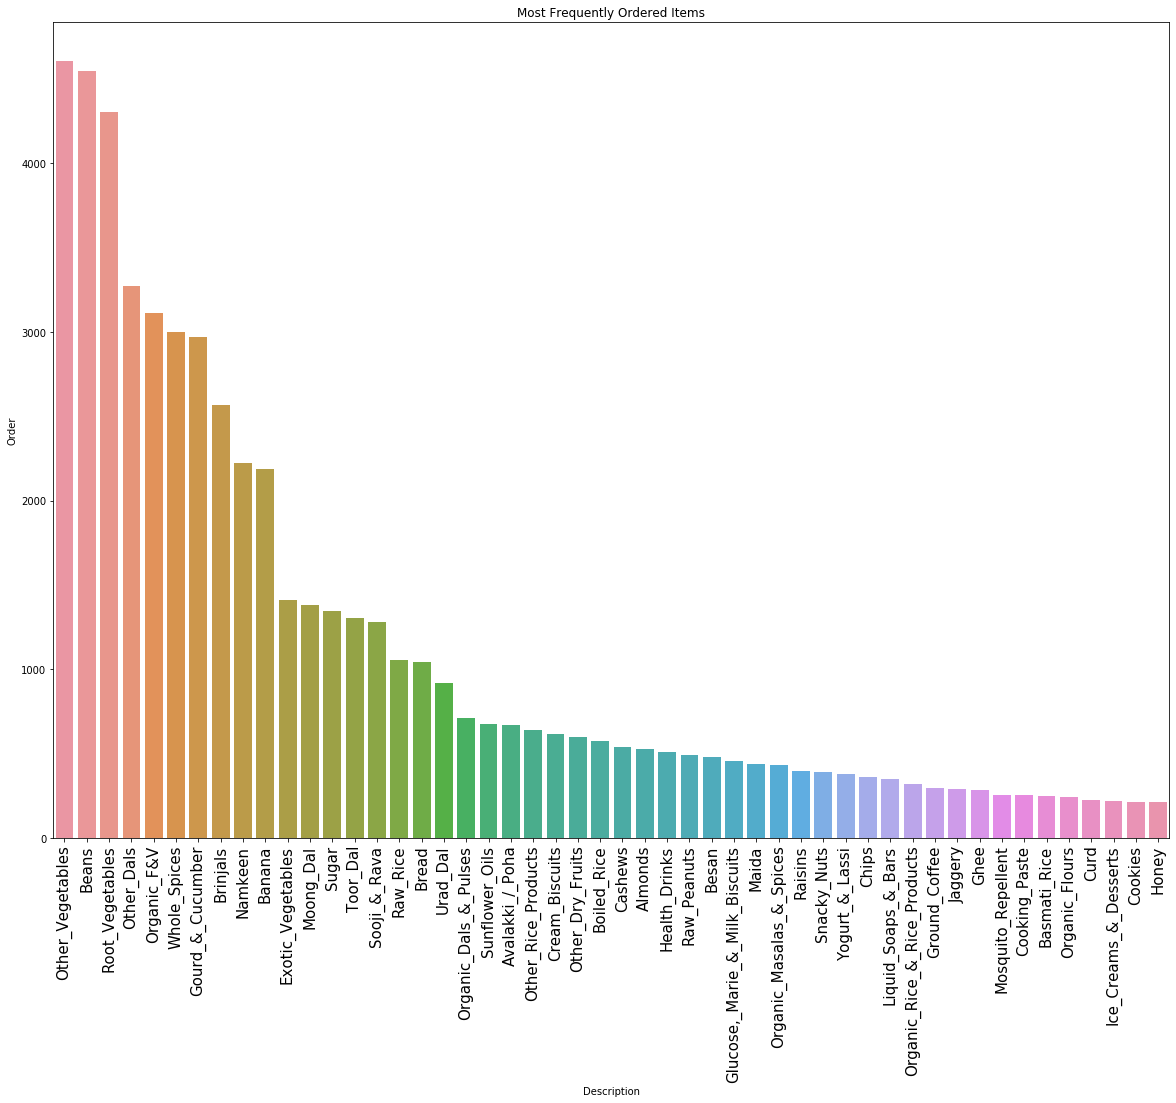

In [9]:
top = 50
Product_freq = df.groupby('Description')['Order'].count().reset_index()
Product_freq = Product_freq.sort_values(by = 'Order', ascending=False)
Product_freq = Product_freq[:top]
plt.figure(figsize = (20,15))
sns.barplot(x= Product_freq['Description'], y=Product_freq['Order'])
plt.title('Most Frequently Ordered Items')
plt.xticks(rotation = 'vertical', size=15)

#### Number of orders per customer

In [10]:
df2 = df.groupby('Member')['Order'].nunique().sort_values(ascending=False)
df2.head(10)

print('Average number of orders per customer: {:.2f}'.format(df2.mean())) 

Member
36432    203
33064    178
33491    156
42182    139
38622    139
31966    137
42513    133
4158     132
45470    126
48101    124
Name: Order, dtype: int64

Average number of orders per customer: 79.12


#### Number of items per order

In [11]:
df3 = df.groupby('Order')['SKU'].nunique().sort_values(ascending=False)
df3.head(10)

print('Average number of items per order: {:.2f}'.format(df3.mean())) 

Order
6738016    42
6438096    41
7696664    38
6506666    37
7597091    36
7487874    35
8272082    35
7829763    35
7684742    34
6664439    34
Name: SKU, dtype: int64

Average number of items per order: 7.41


#### Timestamp Analysis

In [12]:
df4 = df.copy()
df4['Year'] = pd.DatetimeIndex(df['Created_On']).year
df4['Month'] = pd.DatetimeIndex(df['Created_On']).month
df4['Day_of_Month'] = pd.DatetimeIndex(df['Created_On']).day
df4['Day_of_Week'] = pd.DatetimeIndex(df['Created_On']).weekday
df4['Time'] = pd.DatetimeIndex(df['Created_On']).time

df4.head()

,Member,Order,SKU,Created_On,Description,Sales,Year,Month,Day_of_Month,Day_of_Week,Time
0,9736,6468572,34993740,2014-09-22 22:45:00,Other_Sauces,1,2014,9,22,0,22:45:00
1,9736,6468572,15669800,2014-09-22 22:45:00,Cashews,1,2014,9,22,0,22:45:00
2,9736,6468572,34989501,2014-09-22 22:45:00,Other_Dals,1,2014,9,22,0,22:45:00
3,9736,6468572,7572303,2014-09-22 22:45:00,Namkeen,1,2014,9,22,0,22:45:00
4,9736,6468572,15669856,2014-09-22 22:45:00,Sugar,1,2014,9,22,0,22:45:00


#### Hour of Day Analysis

<Figure size 864x360 with 0 Axes>

[Text(0, 0.5, 'Number of Orders')]

Text(0.5, 1.0, 'Hour of Day Order is Placed')

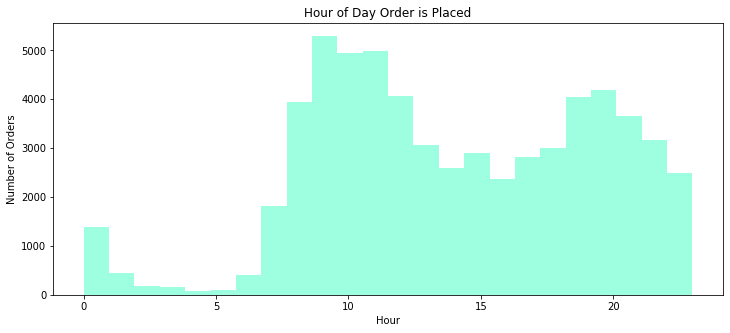

In [13]:
df4['Hour'] = df4['Time'].apply(lambda x: x.hour) 

plt.figure(figsize = (12,5))
ax = sns.distplot(df4['Hour'], kde = False, bins = 24, color='#0AFEB2')
ax.set(ylabel='Number of Orders')

plt.title('Hour of Day Order is Placed')

#### Day of Week Analysis

<Figure size 864x360 with 0 Axes>

[Text(17.199999999999996, 0.5, 'Number of Orders')]

Text(0.5, 1.0, 'Day of Week Order is Placed')

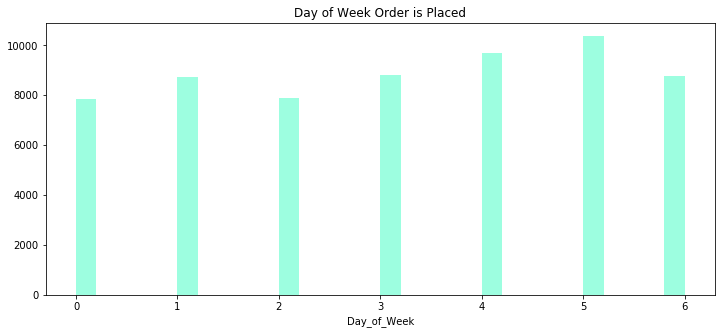

In [14]:
plt.figure(figsize = (12,5))
sns.distplot(df4['Day_of_Week'], kde = False, color='#0AFEB2')
ax.set(ylabel='Number of Orders')
plt.title('Day of Week Order is Placed')

#### Day of Month Analysis

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'Day of Month Order is Placed')

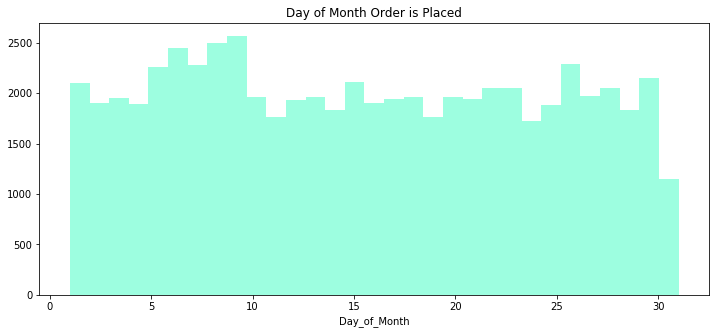

In [15]:
plt.figure(figsize = (12,5))
sns.distplot(df4['Day_of_Month'], kde = False, bins = 31, color='#0AFEB2')
plt.title('Day of Month Order is Placed')

#### Total Items Sold by Year

In [16]:
df4.groupby('Year')['Sales'].count()

Year
2011      117
2012     9792
2013    28077
2014    24155
Name: Sales, dtype: int64

In [17]:
print('Percentage change 2012: ', (9792-117)/117*100)
print('Percentage change 2013: ', (28077-9792)/9792*100)
print('Percentage change 2014: ', (24155-28077)/28077*100)

Percentage change 2012:  8269.23076923077
Percentage change 2013:  186.734068627451
Percentage change 2014:  -13.968728852797662


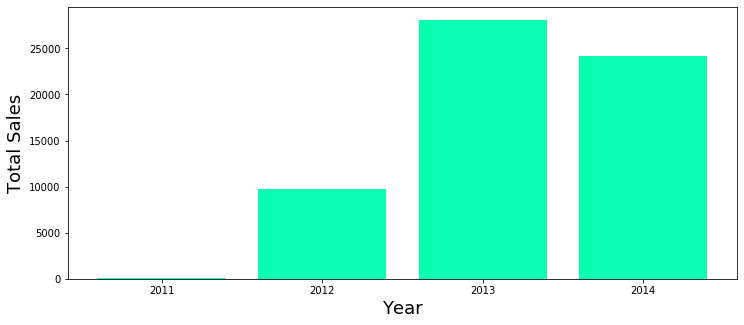

In [18]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax = plt.bar(df4.groupby(['Year']).sum().index,df4.groupby(['Year']).sum()['Sales'], color='#0AFEB2')
ax = plt.xlabel('Year', fontsize=18)
ax = plt.ylabel('Total Sales', fontsize=18)

#### Customers by Year

In [19]:
df4.groupby('Year')['Member'].nunique()

Year
2011      6
2012     81
2013    106
2014    105
Name: Member, dtype: int64

In [20]:
print('Percentage change 2012: ', (81-6)/6*100)
print('Percentage change 2013: ', (106-81)/81*100)
print('Percentage change 2014: ', (105-106)/106*100)

Percentage change 2012:  1250.0
Percentage change 2013:  30.864197530864196
Percentage change 2014:  -0.9433962264150944


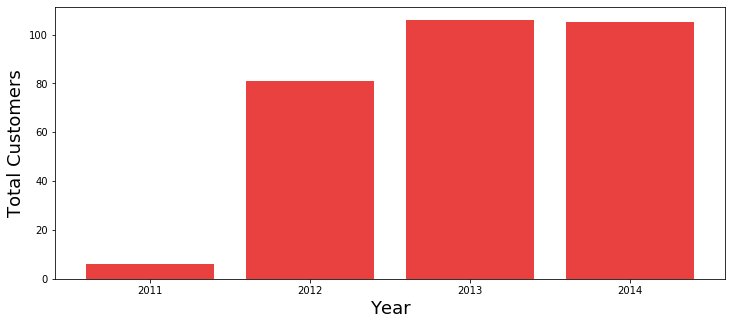

In [21]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax = plt.bar(df4.groupby(['Year']).count().index,df4.groupby(['Year']).nunique()['Member'], color='#E94040')
ax = plt.xlabel('Year', fontsize=18)
ax = plt.ylabel('Total Customers', fontsize=18)

#### Orders by Year

In [22]:
df4.groupby('Year')['Order'].nunique()

Year
2011      20
2012    1291
2013    3802
2014    3274
Name: Order, dtype: int64

In [23]:
print('Percentage change 2012: ', (1291-20)/20*100)
print('Percentage change 2013: ', (3802-1291)/1291*100)
print('Percentage change 2014: ', (3274-3802)/3802*100)

Percentage change 2012:  6355.0
Percentage change 2013:  194.50038729666926
Percentage change 2014:  -13.887427669647554


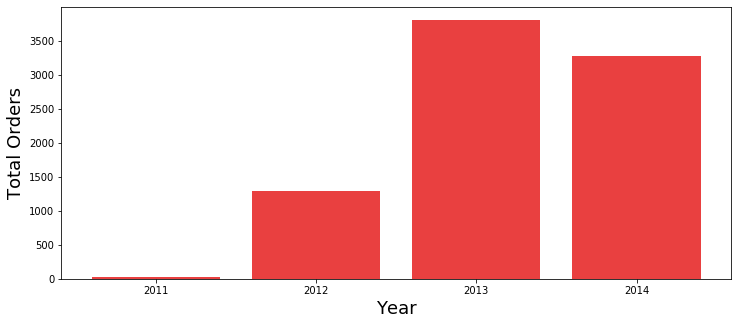

In [24]:
fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax = plt.bar(df4.groupby(['Year']).count().index,df4.groupby(['Year']).nunique()['Order'], color='#E94040')
ax = plt.xlabel('Year', fontsize=18)
ax = plt.ylabel('Total Orders', fontsize=18)

#### Time Between Orders

In [25]:
# Creating a new smaller dataset with only the required features
df_pos_ordered = df.filter(['Member','Created_On'], axis=1)
df_pos_ordered.drop_duplicates(inplace=True)
df_pos_ordered = df_pos_ordered.sort_values(['Member', 'Created_On'], ascending=True).reset_index(drop=True)

df_pos_ordered['Date'] = pd.DatetimeIndex(df_pos_ordered['Created_On']).date

df_pos_ordered.head(100)

,Member,Created_On,Date
0,4158,2012-04-12 20:09:00,2012-04-12
1,4158,2012-10-12 20:00:00,2012-10-12
2,4158,2012-12-16 18:54:00,2012-12-16
3,4158,2012-12-26 15:22:00,2012-12-26
4,4158,2013-01-04 17:40:00,2013-01-04
...,...,...,...
95,4158,2014-01-30 11:12:00,2014-01-30
96,4158,2014-02-05 23:45:00,2014-02-05
97,4158,2014-02-06 12:01:00,2014-02-06
98,4158,2014-02-07 15:55:00,2014-02-07


In [26]:
# Calculating the days difference between orders placed by same customer - results in timedelta object
df_pos_ordered['Days_Between_Orders'] = np.nan

for i in range(0,len(df_pos_ordered)):
    if df_pos_ordered['Member'].iloc[i] == df_pos_ordered['Member'].iloc[i-1]:
            df_pos_ordered['Days_Between_Orders'].iloc[i] = df_pos_ordered['Created_On'].iloc[i] - df_pos_ordered['Created_On'].iloc[i-1] 
    else:
        df_pos_ordered['Days_Between_Orders'].iloc[i] = np.nan

df_pos_ordered = df_pos_ordered.dropna()
        
df_pos_ordered.head(1000)

C:\Users\scarl\Anaconda3\3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Member,Created_On,Date,Days_Between_Orders
1,4158,2012-10-12 20:00:00,2012-10-12,182 days 23:51:00
2,4158,2012-12-16 18:54:00,2012-12-16,64 days 22:54:00
3,4158,2012-12-26 15:22:00,2012-12-26,9 days 20:28:00
4,4158,2013-01-04 17:40:00,2013-01-04,9 days 02:18:00
5,4158,2013-01-07 14:00:00,2013-01-07,2 days 20:20:00
...,...,...,...,...
1010,31101,2013-02-11 10:26:00,2013-02-11,0 days 15:52:00
1011,31101,2013-03-06 12:22:00,2013-03-06,23 days 01:56:00
1012,31101,2013-03-06 16:21:00,2013-03-06,0 days 03:59:00
1013,31101,2013-03-07 22:00:00,2013-03-07,1 days 05:39:00


In [27]:
# Calculating the days difference between orders placed by same customer - results in timedelta object
df_pos_ordered['Days_Between_Orders'] = np.nan

for i in range(0,len(df_pos_ordered)):
    if df_pos_ordered['Member'].iloc[i] == df_pos_ordered['Member'].iloc[i-1]:
            if df_pos_ordered['Created_On'].iloc[i] != df_pos_ordered['Created_On'].iloc[i-1]:
                df_pos_ordered['Days_Between_Orders'].iloc[i] = df_pos_ordered['Date'].iloc[i] - df_pos_ordered['Date'].iloc[i-1]
            else:
                df_pos_ordered['Days_Between_Orders'].iloc[i] = np.nan  
    else:
        df_pos_ordered['Days_Between_Orders'].iloc[i] = np.nan

df_pos_ordered = df_pos_ordered.dropna()
        
df_pos_ordered.head(1000)

,Member,Created_On,Date,Days_Between_Orders
2,4158,2012-12-16 18:54:00,2012-12-16,"65 days, 0:00:00"
3,4158,2012-12-26 15:22:00,2012-12-26,"10 days, 0:00:00"
4,4158,2013-01-04 17:40:00,2013-01-04,"9 days, 0:00:00"
5,4158,2013-01-07 14:00:00,2013-01-07,"3 days, 0:00:00"
6,4158,2013-01-08 15:20:00,2013-01-08,"1 day, 0:00:00"
...,...,...,...,...
1025,31101,2013-05-31 15:30:00,2013-05-31,"2 days, 0:00:00"
1026,31101,2013-06-05 11:53:00,2013-06-05,"5 days, 0:00:00"
1027,31101,2013-06-06 13:59:00,2013-06-06,"1 day, 0:00:00"
1028,31101,2013-06-08 10:05:00,2013-06-08,"2 days, 0:00:00"


In [28]:
# Converting timedelta object to float
def convert_dt(x):
    x = pd.to_numeric(x.days, downcast='float')
    return x

df_pos_ordered['Days_Between_Orders'] = df_pos_ordered['Days_Between_Orders'].apply(lambda x: convert_dt(x))

df_pos_ordered.head(1000)

,Member,Created_On,Date,Days_Between_Orders
2,4158,2012-12-16 18:54:00,2012-12-16,65
3,4158,2012-12-26 15:22:00,2012-12-26,10
4,4158,2013-01-04 17:40:00,2013-01-04,9
5,4158,2013-01-07 14:00:00,2013-01-07,3
6,4158,2013-01-08 15:20:00,2013-01-08,1
...,...,...,...,...
1025,31101,2013-05-31 15:30:00,2013-05-31,2
1026,31101,2013-06-05 11:53:00,2013-06-05,5
1027,31101,2013-06-06 13:59:00,2013-06-06,1
1028,31101,2013-06-08 10:05:00,2013-06-08,2


#### Visualizing Time Between Orders

In [29]:
df_pos_ordered['Days_Between_Orders'].mean()

10.994373088685016

In [30]:
df_pos_ordered['Days_Between_Orders'].max()

303

<Figure size 1080x360 with 0 Axes>

(0, 42)

([<matplotlib.axis.XTick at 0x1d078a7fbc8>,
 <a list of 42 Text xticklabel objects>)

Text(0.5, 1.0, 'Time Between Orders')

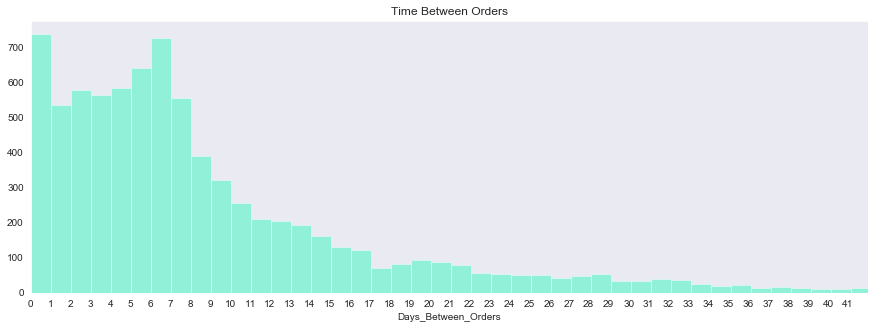

In [31]:
sns.set_style("dark")
plt.figure(figsize = (15,5))
sns.distplot(df_pos_ordered['Days_Between_Orders'], kde=False, bins=302, color='#0AFEB2')
plt.xlim(left = 0, right=42)
plt.xticks(np.arange(0, 42, step=1))
plt.title('Time Between Orders')

#### How many orders are placed within 24 hours of the previous one?

In [32]:
df_pos_ordered[df_pos_ordered.Days_Between_Orders < 1].count()

Member                 213
Created_On             213
Date                   213
Days_Between_Orders    213
dtype: int64

In [33]:
# Of 8,387 total orders, 8,281 are non-first-time orders
# Therefore, what percentage of orders are placed within 24 hours of the previous one?

h24 = 501/8281*100

print('Percentage of orders placed within 24 hours of the previous one: {:.2f}%'.format(h24))

Percentage of orders placed within 24 hours of the previous one: 6.05%


#### How many orders are placed within 48 hours of the previous one?

In [34]:
df_pos_ordered[df_pos_ordered.Days_Between_Orders < 2].count()

Member                 737
Created_On             737
Date                   737
Days_Between_Orders    737
dtype: int64

In [35]:
# What percentage of orders are placed within 48 hours of the previous one?

h48 = 1008/8281*100

print('Percentage of orders placed within 48 hours of the previous one: {:.2f}%'.format(h48))

Percentage of orders placed within 48 hours of the previous one: 12.17%


#### How many orders are placed within 72 hours of the previous one?

In [36]:
df_pos_ordered[df_pos_ordered.Days_Between_Orders < 3].count()

Member                 1272
Created_On             1272
Date                   1272
Days_Between_Orders    1272
dtype: int64

In [37]:
# What percentage of orders are placed within 72 hours of the previous one?

h72 = 1586/8281*100

print('Percentage of orders placed within 72 hours of the previous one: {:.2f}%'.format(h72))

Percentage of orders placed within 72 hours of the previous one: 19.15%


#### How many orders are placed within 1 week or less of the previous one?

In [38]:
df_pos_ordered[df_pos_ordered.Days_Between_Orders <= 7].count()

Member                 4357
Created_On             4357
Date                   4357
Days_Between_Orders    4357
dtype: int64

In [39]:
# What percentage of orders are placed within 1 week or less of the previous one?

h_1wk = 4673/8281*100

print('Percentage of orders placed within 1 week or less of the previous one: {:.2f}%'.format(h_1wk))

Percentage of orders placed within 1 week or less of the previous one: 56.43%


#### Customer Segment Analysis

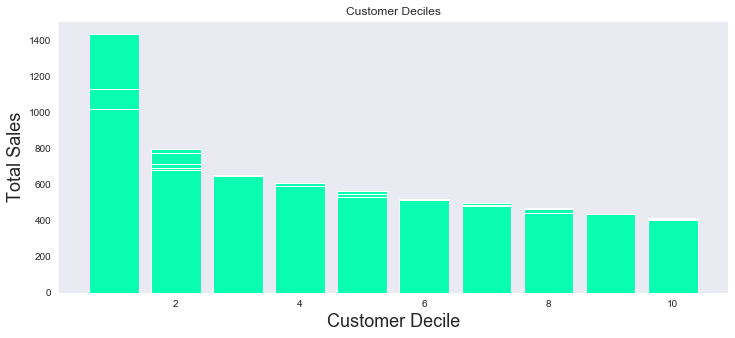

In [40]:
Customer_df = pd.DataFrame(df4.groupby(['Member']).sum()['Sales'])
Customer_df['Customer Decile'] = pd.qcut(Customer_df['Sales'], 10, labels=np.arange(10, 0, -1))

fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax = plt.bar(Customer_df['Customer Decile'],Customer_df['Sales'], color='#0AFEB2')
ax = plt.xlabel('Customer Decile', fontsize=18)
ax = plt.ylabel('Total Sales', fontsize=18)
ax = plt.title('Customer Deciles')

#### Order Size Segmentation

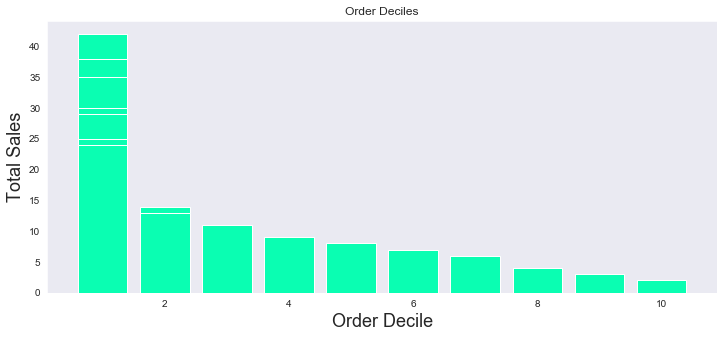

In [41]:
Order_df = pd.DataFrame(df4.groupby(['Order']).sum()['Sales'])
Order_df['Order Decile'] = pd.qcut(Order_df['Sales'], 10, labels=np.arange(10, 0, -1))

fig, ax = plt.subplots(1,1,figsize=(12,5))
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax = plt.bar(Order_df['Order Decile'],Order_df['Sales'], color='#0AFEB2')
ax = plt.xlabel('Order Decile', fontsize=18)
ax = plt.ylabel('Total Sales', fontsize=18)
ax = plt.title('Order Deciles')